# Correction of the exam 2023

There were 5 exam questions:
- 2 multiple choice
- 1 short programming exercise
- 2 longer notebooks

## Multiple choice: Environments

**Which following statements about python packages and conda environments are true? Careful: wrongly ticked answers will give negative points!**

```{dropdown}  When a python package is installed in the base conda environment, it is also installed per default in any other conda environment.

**Answer**: Wrong. Lecture notes on the topic: [](install-env)
```

```{dropdown} "mamba install" is very similar to "conda install", but is usually faster.

**Answer**: Correct. Lecture notes on the topic: [](install-mamba). [Google also knows the answer](https://www.google.com/search?q=is+it+true+that+mamba+is+like+conda+but+faster).
```

```{dropdown} There are different kinds of python interpreters. "ipython" is one one of them.

**Answer**: Correct. [Google knows the answer](https://www.google.com/search?q=is+it+true+that+ipython+is+a+python+interpreter).
```

```{dropdown} numpy is part of the python standard library.

**Answer**: Wrong. [Google knows the answer](https://www.google.com/search?q=is+numpy+part+of+the+python+standard+library).
```

## Multiple choice: Indexing

**Which of the affirmations about the code snippet below are true?**

```python
import numpy as np

a = np.arange(12).reshape((3, 4))
b = a * 2
nz = np.nonzero(a > 8)
b[nz] = a[nz]
```

Wrong answers are penalized! In case of doubt you may choose not to answer.

```{dropdown} This code produces an array b which doubles the values in a, except where the values are strictly larger than 8. In this case, the values are not doubled.

**Answer**: correct. Running the code might have been the best strategy to answer this.

```

````{dropdown} The same result can be obtained using boolean indexing.

**Answer**: Correct. This would be the code:

```python
import numpy as np

a = np.arange(12).reshape((3, 4))
b = a * 2
larger_than_8 = a > 8
b[larger_than_8] = a[larger_than_8]
```

Lecture notes on the topic: [](bool-ind).

````

```{dropdown} The code uses boolean indexing.

**Answer**: Wrong. It uses positional indexing, by asking first *where* (at which position) are the elements which are larger than 8, and then using these positions to index `a` and `b`: therefore, positional indexing. Lecture notes on the topic: [](pos-ind).
```

```{dropdown} The code uses positional indexing.

**Answer**: Correct. It uses positional indexing, by asking first *where* (at which position) are the elements which are larger than 8, and then using these positions to index `a` and `b`: therefore, positional indexing. Lecture notes on the topic: [](pos-ind).
```

## Coding: Taylor function 

Write a function called `taylor_sin` which computes the Taylor approximation of the sinus function:

$$
 \sin(x) = \sum_{i=0}^n (-1)^i\frac{x^{2i+1}}{(2i+1)!} = \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} \mp \dots
$$

With ! denotating the number's factorial. The inputs n and x should be given as argument to the function. Quantify the uncertainty of the approximation for x = π / 2 and n=5.

**Answer:**

In [16]:
import math

def taylor_sin(x, n):
    output = 0
    for i in range(n+1):
        output += (-1)**i * x**(2*i+1) / math.factorial(2*i+1)
    return output

x = math.pi / 2


true_value = math.sin(x)

n = 5
print(f'Error for x = π / 2 and n={n}: {taylor_sin(x, n) - true_value}')

Error for x = π / 2 and n=5: -5.625894905492146e-08


Other values of n:

In [18]:
for n in [1, 3, 5, 7]:
    print(f'Error for x = π / 2 and n={n}: {taylor_sin(x, n) - true_value}')

Error for x = π / 2 and n=1: -0.07516777071134961
Error for x = π / 2 and n=3: -0.00015689860050127624
Error for x = π / 2 and n=5: -5.625894905492146e-08
Error for x = π / 2 and n=7: -6.023181953196399e-12


## Notebook: Greenland 

Here is a link to a .csv file to download:

https://cluster.klima.uni-bremen.de/~fmaussion/teaching/inpro/greenland.csv

It contains data from an automatic weather station at the North of the Greenland ice-sheet. It contains the measured incoming ("down") and outgoing ("up") shorwtave radiation at the station.

Your task is to return a Jupyter Notebook (upload button) which does the following:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Read the csv file using pandas, and make sure the index of the `DataFrame` has the datatype `DatetimeIndex`.**

In [70]:
df = pd.read_csv('https://cluster.klima.uni-bremen.de/~fmaussion/teaching/inpro/greenland.csv', index_col=0, parse_dates=True)
df.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=61368, freq=None)

**2. For both data columns, replace missing values with NaN (missing values can be found easily)**

In [28]:
df = df.replace(-999., np.nan)

**3. Select data from the years 2010 to 2015 only (i.e. discard the incomplete year 2016). From now on, we only analyze data from 2010 to 2015.**

In [24]:
df = df.loc['2010':'2015']

**4. Compute the average albedo at this location, which is computed as: $\sum SW_{up} / \sum SW_{down}$ over the entire time period from 2010 to 2015.**

In [30]:
albedo = df['ShortwaveRadiationUp_Cor(W/m2)'].sum() / df['ShortwaveRadiationDown_Cor(W/m2)'].sum()
albedo

0.7651400384858785

**5. Compute the monthly average radiation from the data, and plot it on a line plot (see example below). Tip: if you don't manage this question, you can still do the rest of the exercise independently.**

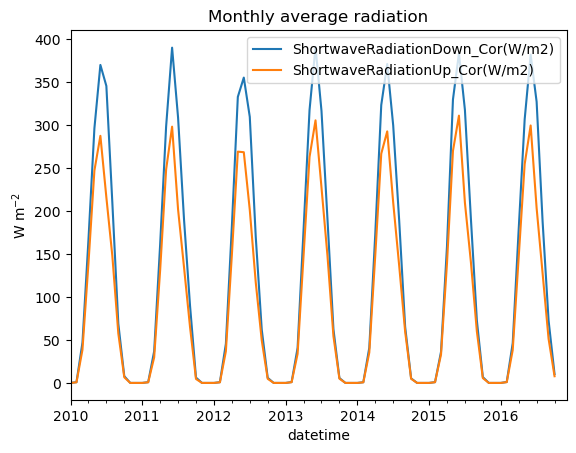

In [31]:
df.resample('MS').mean().plot(); 
plt.ylabel('W m$^{-2}$'); 
plt.title('Monthly average radiation');

**6. Compute the daily cycle of radiation (average hourly radiation) for the month of June. I expect a DataFrame with index of type integer, with values from 0 to 23.**

In [32]:
dfs = df.loc[df.index.month == 6]
dfs = dfs.groupby(dfs.index.hour).mean()
dfs.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='datetime')

**7. Using the hourly average data from question 6: at what time of day in the incoming radiation largest? What is its value?**

In [35]:
dfs['ShortwaveRadiationDown_Cor(W/m2)'].max()

578.0933333333334

In [41]:
dfs['ShortwaveRadiationDown_Cor(W/m2)'].idxmax()

14

or:

In [45]:
dfs['ShortwaveRadiationDown_Cor(W/m2)'].loc[dfs['ShortwaveRadiationDown_Cor(W/m2)'] == dfs['ShortwaveRadiationDown_Cor(W/m2)'].max()]

datetime
14    578.093333
Name: ShortwaveRadiationDown_Cor(W/m2), dtype: float64

**8. Plot the daily cycle of hourly incoming radiation in January, March and July as line plot. Tip: the x-axis of the plot should show the hour of the day, from 0 to 23. Add the outgoing radiation as a dashed line (see example plot below).**

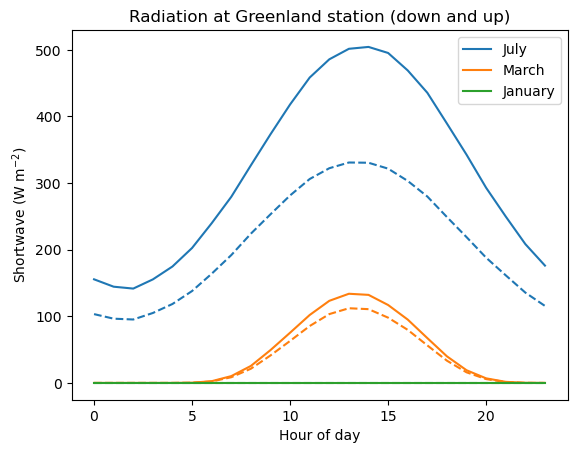

In [49]:
dfs = df.loc[df.index.month == 7]
dfs = dfs.groupby(dfs.index.hour).mean()
dfs['ShortwaveRadiationDown_Cor(W/m2)'].plot(label='July', color='C0');
dfs['ShortwaveRadiationUp_Cor(W/m2)'].plot(label='', linestyle='--', color='C0');


dfs = df.loc[df.index.month == 3]
dfs = dfs.groupby(dfs.index.hour).mean()
dfs['ShortwaveRadiationDown_Cor(W/m2)'].plot(label='March', color='C1');
dfs['ShortwaveRadiationUp_Cor(W/m2)'].plot(label='', linestyle='--', color='C1');

dfs = df.loc[df.index.month == 1]
dfs = dfs.groupby(dfs.index.hour).mean()
dfs['ShortwaveRadiationDown_Cor(W/m2)'].plot(label='January', color='C2');
dfs['ShortwaveRadiationUp_Cor(W/m2)'].plot(label='', linestyle='--', color='C2');

plt.legend(); plt.ylabel('Shortwave (W m$^{-2}$)'); plt.xlabel('Hour of day'); plt.title('Radiation at Greenland station (down and up)');

## Notebook: Peru 

Here is a code snippet which loads 2D data from the web:

In [47]:
from urllib.request import Request, urlopen
from io import BytesIO
import numpy as np

# Parse the given url
url = 'https://cluster.klima.uni-bremen.de/~fmaussion/teaching/inpro/chirps_peru_avg.npz'
req = urlopen(Request(url)).read()
with np.load(BytesIO(req)) as data:
    annual_prcp = data['annual_prcp']
    lon = data['lon']
    lat = data['lat']

Copy this code snippet and paste it in an empty notebook. Execute the code.

`annual_prcp` is a numpy array of shape (lat, lon) and represents the average annual precipitation (unit mm/d) over the country of Peru.

Upload a Jupyter Notebook (upload button) which addresses the following tasks. *Tip: many of the tasks can be done independently from the other ones! Pick the ones you know how to do quickly.*

**1. Compute `annual_prcp_myr`, the average annual precipitation in units meter per year (m yr-1). For this you can assume that a year has 365.25 days on average.**

In [48]:
annual_prcp_myr = annual_prcp / 1000 * 365.25

**2. Plot the 2D array `annual_prcp_myr` with the `blues` colormap. Add a colorbar and ticks and axis labels (Lon, Lat). *Tip: if you want your map to not be squeezed, you may have to use ax.set_aspect('equal') after you plotted the data.***

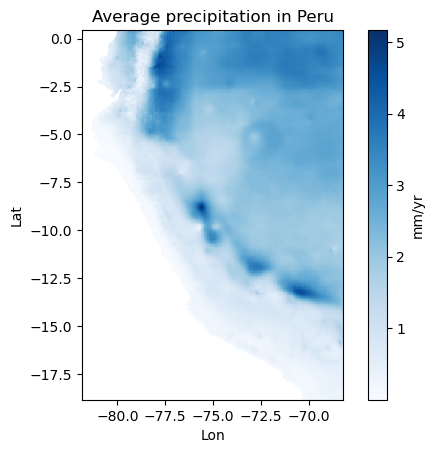

In [50]:
f, ax = plt.subplots()
im = ax.pcolormesh(lon, lat, annual_prcp_myr, shading='nearest', cmap='Blues');
ax.set_aspect('equal');
f.colorbar(im, label='mm/yr'); ax.set_xlabel('Lon'); ax.set_ylabel('Lat'); ax.set_title('Average precipitation in Peru');

**3. Count the number of pixels in `annual_prcp_myr` which have a precipitation value over 5 m yr-1.**

In [52]:
(annual_prcp_myr > 5).sum()

6

**4. Create the array `annual_prcp_myr_subset`, which is a subset of the `annual_prcp_myr` array selected between the indices  217 and 316 in latitude, and the indices 37 and 176 in longitude. The resulting 2D array should be of shape (99, 139).**

In [53]:
annual_prcp_myr_subset = annual_prcp_myr[217:316, 37:176]
annual_prcp_myr_subset.shape

(99, 139)

**5. Now create the arrays `lon_subset` and `lat_subset`, which are the corresponding coordinates selected over the same indices. `lon_subset` should have the shape (139,) and `lat_subset` should have the shape (99,).**

In [56]:
lon_subset = lon[37:176]
lon_subset.shape

(139,)

In [58]:
lat_subset = lat[217:316]
lat_subset.shape

(99,)

**6. Now average `annual_prcp_myr_subset` over the latitudes to create an array of shape (139,) named `annual_prcp_myr_subset_lat`.**

In [60]:
annual_prcp_myr_subset_lat = annual_prcp_myr_subset.mean(axis=0)
annual_prcp_myr_subset_lat.shape

(139,)

**7. Plot `annual_prcp_myr_subset_lat` as a line plot as the example plot below.**

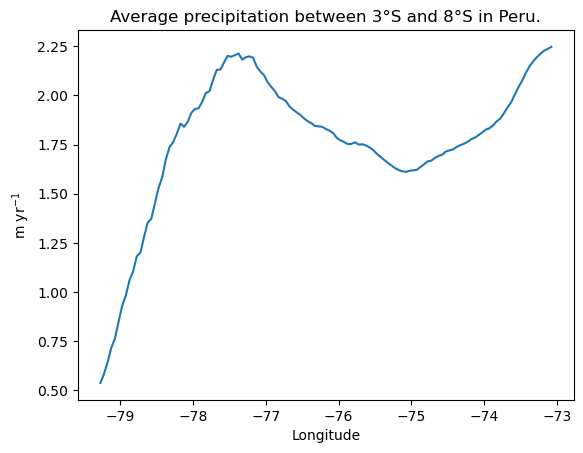

In [63]:
plt.plot(lon_subset, annual_prcp_myr_subset_lat);
plt.title('Average precipitation between 3°S and 8°S in Peru.')
plt.xlabel('Longitude'); plt.ylabel('m yr$^{-1}$'); 

**8. Using a numpy function you learnt during the lecture, find out why I chose the indices 217 and 316 to select data for latitudes between -3° and -8°.**

In [68]:
p = np.nonzero((lat < -3) & (lat >-8))[0]
p

array([217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
       282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316])

In [69]:
p.min(), p.max()

(217, 316)